In [176]:
import matplotlib.pyplot as plt
import numpy as np 
import cv2 
import time
from scipy.ndimage import convolve
from skimage import exposure
from skimage.morphology import disk
from skimage.filters.rank import equalize
from skimage.filters.rank import median

### Parte 1: Filtros lineales suavizantes

1. Carga y visualizacion de imágenes

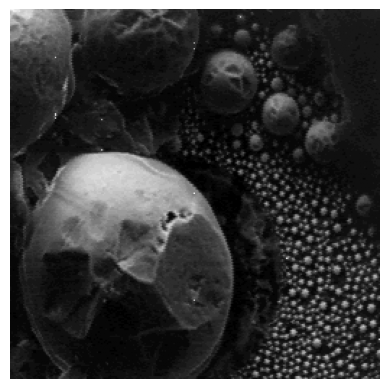

In [154]:
path_meb= "MEB.png"
img_meb = cv2.imread(path_meb, cv2.IMREAD_GRAYSCALE)
img_meb = img_meb.astype(np.int32)
plt.imshow(img_meb, cmap="gray")
plt.axis("off")
plt.show()

### Parte 2: Filtros lineales separables

2. Cargue la imagen meb.png y remuestréela para obtener una imagen de tamaño 2048x2048.

In [155]:
meb_path = "MEB.png"
img_meb = cv2.imread(meb_path,cv2.IMREAD_GRAYSCALE)
x = 2048
y = 2048
img_meb_resize = cv2.resize(img_meb,(x,y),interpolation=cv2.INTER_NEAREST)
print (img_meb_resize.shape)

(2048, 2048)


3. Aplique un filtros promedio de 3x3 a la imagen usando una convolución. Realice varias ejecuciones y mida el tiempo de las mismas.

In [156]:
kernel = np.ones((3,3))/9
n = 50
tiempos = []
meb_3x3 = None
for x in range(n):
    inicio = time.perf_counter()
    meb_3x3 = convolve(img_meb_resize,kernel)
    fin = time.perf_counter()
    tiempos.append(fin-inicio)
print(tiempos)
print("promedio: ",np.mean(tiempos))
print("minimo: ",np.min(tiempos))
print("max: ",np.max(tiempos))

[0.053169400000115274, 0.05651660000148695, 0.05068630000096164, 0.05536030000075698, 0.04950579999967886, 0.04801009999937378, 0.051359499999307445, 0.050063599999703, 0.05055920000086189, 0.04951140000048326, 0.05303780000031111, 0.05089070000030915, 0.04786760000024515, 0.04760849999911443, 0.07049079999887908, 0.06447099999968486, 0.07511650000014924, 0.06988240000100632, 0.06368339999971795, 0.058866899998974986, 0.05773170000065875, 0.04818909999994503, 0.048269799999616225, 0.04778890000125102, 0.051879399999961606, 0.05194620000111172, 0.04913750000014261, 0.060720499999661115, 0.05552299999908428, 0.052898000001732726, 0.05322809999961464, 0.05020619999959308, 0.11883189999934984, 0.0723046000002796, 0.05108189999918977, 0.053611799999998766, 0.05514670000047772, 0.04803920000085782, 0.04792730000008305, 0.05115250000017113, 0.05078920000050857, 0.05854869999893708, 0.05047039999953995, 0.04969809999965946, 0.049866700001075515, 0.05110130000139179, 0.0607612000003428, 0.05564

4. Aplique un filtro promedio de 3x1 sobre la imagen de trabajo y luego un filtro promedio de 1x3 usando una convolución. Realice varias ejecuciones y mida el tiempo de las mismas.

In [157]:
kernel1 = np.ones((3,1))/3
kernel2 = np.ones((1,3))/3
n = 50 
tiempos1 = []
meb_3x3_2 = None

for x in range(n):
    inicio = time.perf_counter()
    res1 = convolve(img_meb_resize,kernel1)
    meb_3x3_2 = convolve(res1,kernel2)
    fin = time.perf_counter()
    tiempos1.append(fin-inicio)

print("tiempos")
print("promedio: ",np.mean(tiempos1))
print("minimo: ",np.min(tiempos1))
print("max: ",np.max(tiempos1))


tiempos
promedio:  0.07303000800005975
minimo:  0.06501650000063819
max:  0.15571930000078282


5. Grafique el resultado comparativo de los tiempos de ejecución para los puntos anteriores.

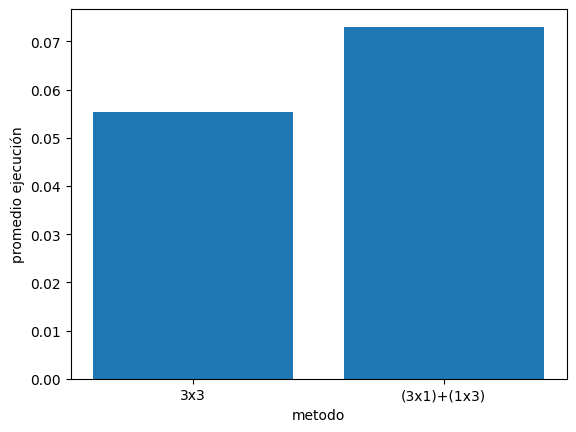

In [158]:
metodos = ["3x3", "(3x1)+(1x3)"]
promedios = [np.mean(tiempos),np.mean(tiempos1)]
plt.figure()
plt.bar(metodos,promedios)
plt.xlabel("metodo")
plt.ylabel("promedio ejecución")
plt.show()

6. Efectúe una sustracción de estas imágenes para corroborar el resultado Las dos imágenes resultantes, ¿son idénticas? 

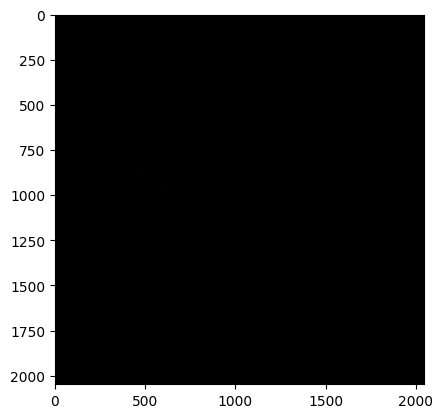

maximo:  2


In [159]:
substraccion = cv2.subtract(meb_3x3,meb_3x3_2)

plt.imshow(substraccion,cmap='gray',vmin=0,vmax=255)
plt.show()
print("maximo: ",np.max(substraccion))

El filtro promedio 3×3 es separable en un filtro 3×1 seguido de un filtro 1×3, reduciendo teóricamente el número de operaciones elementales de 17 a 10 por píxel. Sin embargo, experimentalmente el método directo resultó más rápido.

Las imágenes no son idénticas bit a bit(pero practicamente iguales). Se observa una diferencia máxima de 2(osea nada jasjasja) niveles de gris. Esta diferencia se debe a errores de redondeo y al orden de las operaciones en la implementación separable, donde el redondeo ocurre en dos etapas en lugar de una.

In [160]:
kernel = np.ones((30,30))/(30*30)
kernel1 = np.ones((1,30))/30
kernel2 = np.ones((30,1))/30

inicio = time.perf_counter()
res = convolve(img_meb_resize,kernel)
final = time.perf_counter()
tiempos = final-inicio
inicio = time.perf_counter()
res1 = convolve(img_meb_resize,kernel1)
res2 = convolve(res1,kernel2)
final = time.perf_counter()
tiempos2 = final-inicio
print("3x3: ",tiempos)
print("1+3,3*1: ",tiempos2)
sub = cv2.subtract(res,res2)
print("maxima diferencia",sub.max())

3x3:  3.7157485999996425
1+3,3*1:  0.24432100000012724
maxima diferencia 2


Para filtros pequeños (3×3) la implementación directa puede ser incluso más rápida debido al bajo número de operaciones y la optimización interna de la función de convolución.
Sin embargo, al aumentar el tamaño del kernel a 30×30, el número de operaciones del método directo crece cuadráticamente, mientras que el método separable crece linealmente con el tamaño del kernel.

Experimentalmente se observó una reducción significativa del tiempo de ejecución (de casi 4 segundos a menos de 0.5 segundos), lo que confirma la ventaja computacional de la separabilidad en filtros de gran tamaño.

### Parte 3: Filtros no lineales

### Parte 4: Ejercicio de síntesis taller 5

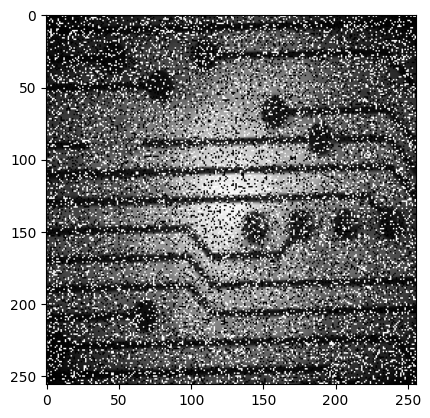

In [161]:
noised_cicuit_path = "NOISED_CIRCUIT.png"
noised_circuit = cv2.imread(noised_cicuit_path,cv2.IMREAD_GRAYSCALE)
plt.imshow(noised_circuit,cmap='gray')
plt.show()

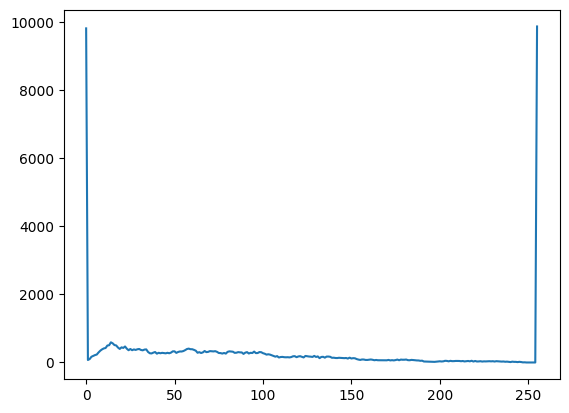

In [162]:
hist = cv2.calcHist([noised_circuit],[0],None, [256],[0,256])
plt.plot(hist)
plt.show()

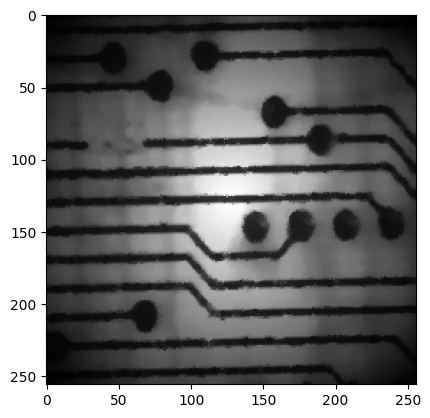

In [163]:
correcion_sal_pimineta = median(noised_circuit, footprint=disk(3))
plt.imshow(correcion_sal_pimineta,cmap='gray')
plt.show()

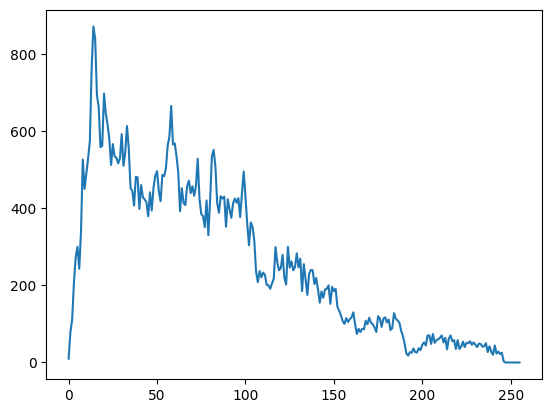

In [164]:
hist = cv2.calcHist([correcion_sal_pimineta],[0],None, [256],[0,256])
plt.plot(hist)
plt.show()

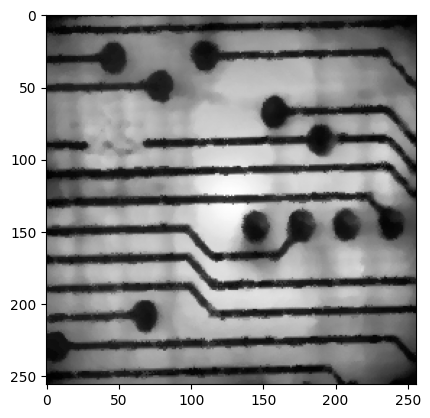

In [165]:
correccion_ecualizacion = equalize(correcion_sal_pimineta, disk(60))
plt.imshow(correccion_ecualizacion,cmap='gray')
plt.show()

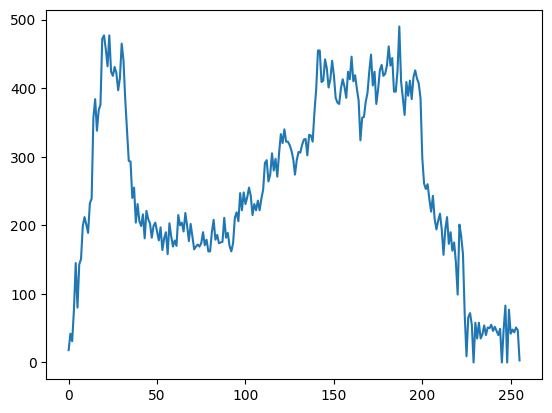

In [166]:
hist = cv2.calcHist([correccion_ecualizacion],[0],None, [256],[0,256])
plt.plot(hist)
plt.show()

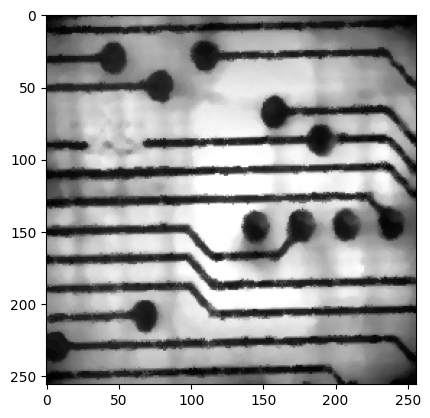

In [177]:
add_brillo = cv2.add(correccion_ecualizacion,40)
plt.imshow(add_brillo,cmap='gray')
plt.show()

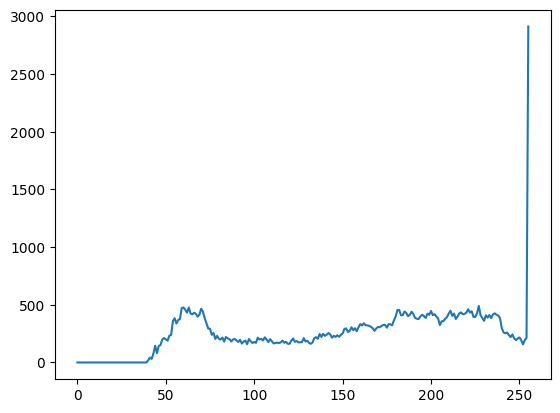

In [175]:
hist = cv2.calcHist([add_brillo],[0],None, [256],[0,256])
plt.plot(hist)
plt.show()

Senparece restoooooo el historama de esta. y de la original. Mero 5/5

-------------------------------------

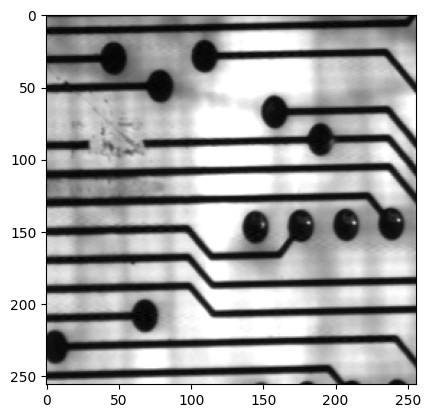

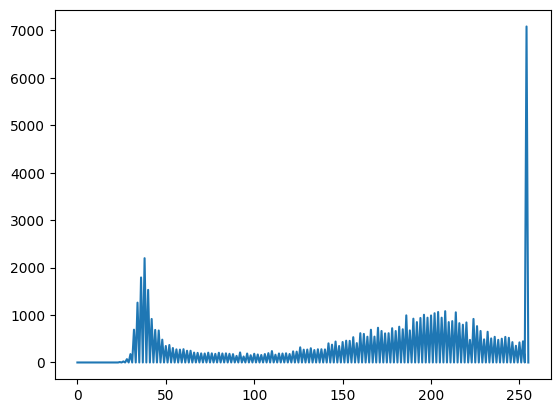

In [169]:
circuit_path = "CIRCUIT.png"
circuit = cv2.imread(circuit_path,cv2.IMREAD_GRAYSCALE)
plt.imshow(circuit,cmap='gray')
plt.show()
hist = cv2.calcHist([circuit],[0],None, [256],[0,256])
plt.plot(hist)
plt.show()